In [19]:
import pandas as pd

In [20]:
import joblib

In [21]:
import numpy as np

In [22]:
import seaborn

In [23]:
import matplotlib.pyplot as plt

In [24]:
import sklearn

In [25]:
from collections import Counter

In [26]:
import sys
additional_paths = ['/Users/rubber/SpeedyCommentExtractor', '/Library/Frameworks/Python.framework/Versions/3.9/lib/python39.zip', '/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9', '/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/lib-dynload', '/Users/rubber/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages']
for p in additional_paths:
    sys.path.append(p)

In [27]:
%matplotlib inline 

In [28]:
data = pd.read_csv('full13.csv')
print("rows:", data.shape[0] - 1)
split = False

rows: 1181


In [29]:
data

,commentid,original_comment,label,line,language,new_line,location,length,source,trigram
0,1,Simple end list indicator for cases when we wa...,"hedonism, conformity","['simpl', 'end', 'list', 'indic', 'case', 'wan...",xml,simpl end list indic case want make sure fab c...,/var/folders/0z/w9k_bhsd1pv7yblndck71ync0000gn...,12,wordpress,"[('simpl', 'end', 'list'), ('end', 'list', 'in..."
1,2,Wraps the compat and OS versions of the Notifi...,hedonism,"['wrap', 'compat', 'os', 'version', 'notif', '...",kotlin,wrap compat os version notif build er easili a...,/tmp/tmpdk05w3ez/app/src/main/java/org/thought...,29,signal,"[('wrap', 'compat', 'os'), ('compat', 'os', 'v..."
2,3,TODO investigate if this false cause any issues!,security,"['todo', 'investig', 'fals', 'caus', 'issu']",java,todo investig fals caus issu,/tmp/tmpsxsprcp1/OsmAnd/src/net/osmand/plus/ac...,5,osmand,"[('todo', 'investig', 'fals'), ('investig', 'f..."
3,4,ProfileEditNameFragment Removed by excludeNonT...,security,"['profil', 'editnam', 'fragment', 'remov', 'ex...",xml,profil editnam fragment remov exclud nontransl...,/tmp/tmp7qfv_owk/app/src/main/res/values-tl/st...,20,osmand,"[('profileeditnamefrag', 'remov', 'excludenont..."
4,5,"We have no idea why, so we're just catching it...","self-direction, security","['idea', 'catch', 'mark', 'messag', 'failur', ...",java,idea catch mark messag failur way least repeat...,/var/folders/0z/w9k_bhsd1pv7yblndck71ync0000gn...,24,signal,"[('note', '110414', 'there'), ('110414', 'ther..."
...,...,...,...,...,...,...,...,...,...,...
1177,1178,"Google doesn't publish checksums. Why, Google,...",none,"['googl', 'publish', 'check', 'sum', 'googl']",xml,googl publish check sum googl,/Users/rubber/fenix/taskcluster/scripts/toolch...,4,firefox,"[('google', 'publish', 'checksums'), ('publish..."
1178,1179,Test running on betarelease builds in CI: caut...,conformity,"['test', 'run', 'beta', 'releas', 'build', 'ci...",kotlin,test run beta releas build ci caution make cha...,/Users/rubber/fenix/app/src/androidTest/java/o...,13,firefox,"[('test', 'running', 'betarelease'), ('running..."
1179,1180,"This is just a super secret crash button, so i...",none,"['super', 'secret', 'crash', 'button', 'interf...",xml,super secret crash button interfer real element,/var/folders/0z/w9k_bhsd1pv7yblndck71ync0000gn...,8,wordpress,"[('super', 'secret', 'crash'), ('secret', 'cra..."
1180,1181,"get children for this comment, set their level...",none,"['get', 'child', 'ren', 'comment', 'set', 'lev...",kotlin,get child ren comment set level add parent,/var/folders/0z/w9k_bhsd1pv7yblndck71ync0000gn...,7,wordpress,"[('get', 'children', 'comment'), ('children', ..."


In [30]:
labels = set()

tmp = data['label'].apply(lambda x: x.split(', '))
for label in tmp:
    labels = labels.union(label)
    
labels

{'achievement',
 'benevolence',
 'conformity',
 'hedonism',
 'none',
 'power',
 'security',
 'self-direction',
 'stimulation',
 'universalism'}

LABELS:
-----------------
1233
{'stimulation', 'security', 'achievement', 'universalism', 'power', 'conformity', 'hedonism', 'self-direction', 'benevolence', 'none'}


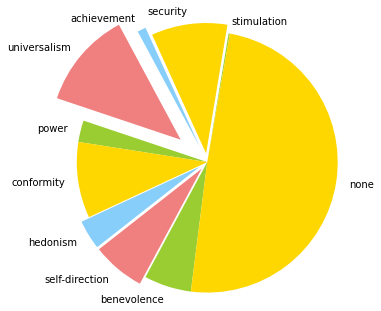

In [31]:
arr = []
print("LABELS:", end="\n-----------------\n")

labels_counter = {}

for label in labels:
    labels_counter[label] = 0

for data_labels in tmp:
    for label in labels:
        for data_label in data_labels:
            if data_label == label:
                labels_counter[label] += 1
            
arr = []

for label_name, frequency in labels_counter.items():
    arr.append(frequency)

print(sum(arr))
print(labels)
    
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0,0.1,0.2,0.4,0,0,0.1,.1,0,0)
plt.pie(arr, labels=labels, radius=1.5, colors=colors, explode=explode, shadow=False, startangle=80)
plt.savefig('label_distribution.jpg', dpi=1000)

In [32]:
print(Counter(data['source']))

Counter({'firefox': 503, 'osmand': 222, 'signal': 152, 'wordpress': 139, 'cgeo': 58, 'fbreader': 50, 'termux': 31, 'k-9': 18, 'duckduckgo': 6, 'bitcoin-wallet': 3})


In [33]:
split = False or split

if split == False:
    data['label'] = data['label'].apply(lambda x: x.split(', '))
    #data['label'] = data['label'].apply(lambda x: [] if ['none'] == x else x)
    data['label'] = data['label'].apply(lambda x: np.array(x))
    split = True

In [34]:
data['label']

0           [hedonism, conformity]
1                       [hedonism]
2                       [security]
3                       [security]
4       [self-direction, security]
                   ...            
1177                        [none]
1178                  [conformity]
1179                        [none]
1180                        [none]
1181                        [none]
Name: label, Length: 1182, dtype: object

# Missing data

commentid           0.0
original_comment    0.0
label               0.0
line                0.0
language            0.0
new_line            0.0
location            0.0
length              0.0
source              0.0
trigram             0.0
dtype: float64


<AxesSubplot:>

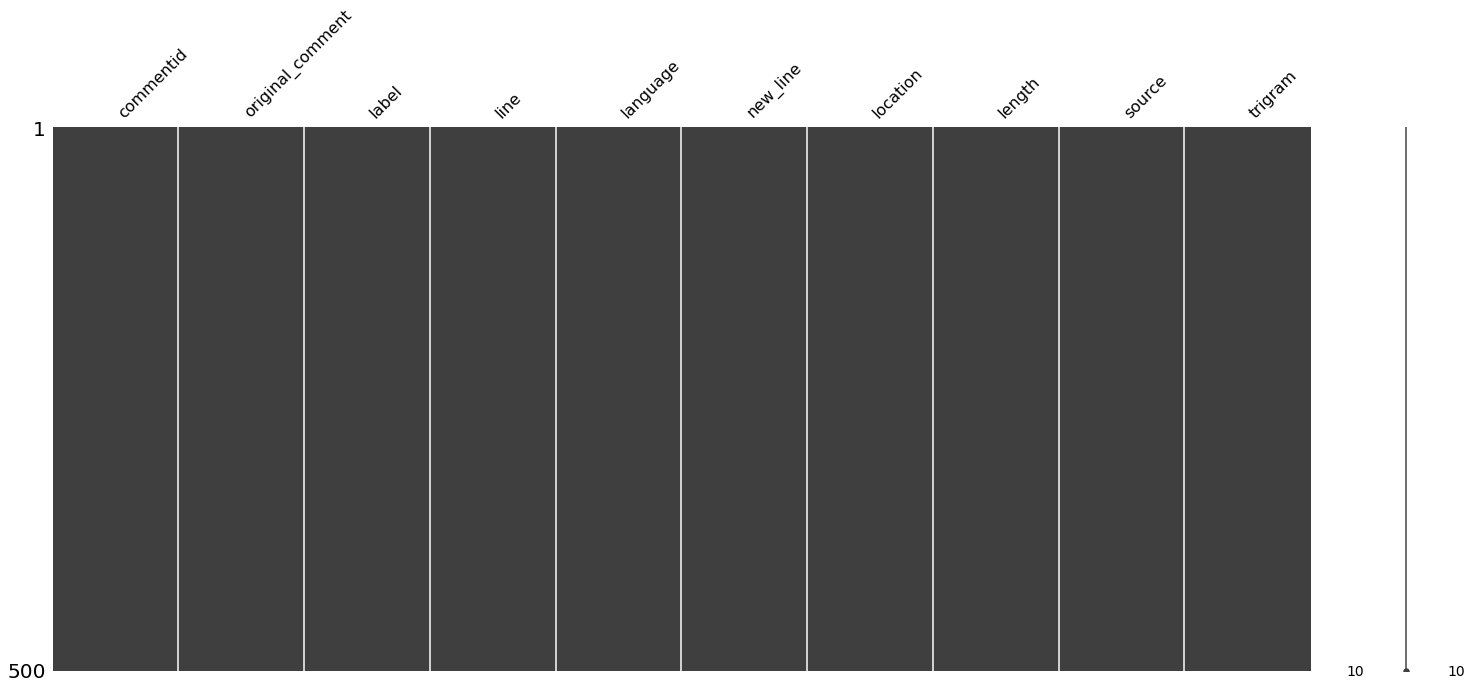

In [35]:
import missingno as msno
mean_missing_data = data.isnull().mean() * 100
print(mean_missing_data)
msno.matrix(data.sample(500))

# Splitting dataset

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import math
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import SMOTEN, RandomOverSampler, SMOTE

number_of_samples = min(data.shape[0], 1000000)

data.drop(columns="location")
data.drop(columns="commentid")

X_train, X_test, y_train, y_test = train_test_split(data[0:number_of_samples],
                                                    data['label'][0:number_of_samples],
                                                    random_state=1, shuffle=False)
print("length of training set", end=": ")                                                   
print(round(100*len(X_train)/len(data))/100)
print("length of testing set", end=": ")                                                   
print(round(100*len(X_test)/len(data))/100)
col_to_incl = ['new_line', 'language']
X_train = X_train[col_to_incl]
X_test = X_test[col_to_incl]

length of training set: 0.75
length of testing set: 0.25


In [37]:
# Oversample

In [38]:
from itertools import chain
from math import nan

def find_denom(li, v_count):
    try:
        res = sum(map(v_count.get, li)) / (len(li))
        #print(res)
        return res
    except:
        return nan


def oversample(x, y, len_mult=2, random_state=0) -> pd.DataFrame:
    df = pd.DataFrame()
    #print(y)
    df['y'] = y
    df['language'] = x['language']
    df['new_line'] = x['new_line']
    value_counts = Counter(chain(*df['y'].dropna()))
    #print(value_counts)
    denom = df['y'].map(lambda li: find_denom(li, value_counts), na_action='ignore')
    weights = 1 / (denom)
    weights.fillna(weights.sum() / weights.count(), inplace=True)
    #print(weights)
    extra_df = df.sample(
        len(df) * (len_mult-1), replace=True, weights=weights, random_state=random_state
    )
    df = pd.concat([df, extra_df])
    
    res_y = df['y']
    res_x = df[['new_line', 'language']]
    return res_x, res_y



In [39]:
oversampled_x_train, oversampled_y_train = oversample(X_train, y_train)

In [40]:
Counter(chain(*y_train))

Counter({'hedonism': 36,
         'conformity': 89,
         'security': 95,
         'self-direction': 71,
         'universalism': 118,
         'none': 426,
         'benevolence': 57,
         'power': 25,
         'achievement': 10,
         'stimulation': 2})

In [41]:
Counter(chain(*oversampled_y_train))

Counter({'hedonism': 132,
         'conformity': 179,
         'security': 187,
         'self-direction': 180,
         'universalism': 227,
         'none': 499,
         'benevolence': 149,
         'power': 113,
         'achievement': 91,
         'stimulation': 117})

# Vectorisation

In [42]:
http_response_status_codes = np.linspace(100, 599, 500)
def process_out_noise(input):
    max_word_length = 18
    output = re.sub(r'\d+', '', input)
    w = re.findall(r'\w+', output)
    res = ""
    
    for word in w:
        if len(word) <= max_word_length:
            res += " " + word
    
    if output != '' and len(output) <= max_word_length:
        return output
    return res
    

In [43]:
X_train

,new_line,language
0,simpl end list indic case want make sure fab c...,xml
1,wrap compat os version notif build er easili a...,kotlin
2,todo investig fals caus issu,java
3,profil editnam fragment remov exclud nontransl...,xml
4,idea catch mark messag failur way least repeat...,java
...,...,...
881,recent tab header text jump back recent tab ho...,xml
882,todo chrisn see work around java io reader rea...,java
883,number tri local builder instead avail api num...,java
884,lnumbern error runtim crash want ship,xml


In [44]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import scipy.sparse as sp
import re
from sklearn.feature_extraction.text import TfidfVectorizer

count_vector = CountVectorizer(min_df = 1, ngram_range=(1,3), max_df=1000, encoding='utf-8', analyzer='word')


res = []
length = X_train.shape[0]

def fit_training_data(training_data, testing_data, count_vector):

    training_data = training_data.apply(lambda col: col.str.strip())
    count_vector.fit(training_data.stack())
    training_data = training_data.apply(lambda x: count_vector.transform(x))
    training_data = sp.hstack(training_data )
    testing_data = sp.hstack(testing_data.apply(lambda x: count_vector.transform(x))) # print(type(x)))) #
    joblib.dump(count_vector, 'vectorizer.pkl')
    return training_data, testing_data, count_vector


print(X_train)
training_data, testing_data, count_vector = fit_training_data(X_train, X_test, count_vector)


                                              new_line language
0    simpl end list indic case want make sure fab c...      xml
1    wrap compat os version notif build er easili a...   kotlin
2                         todo investig fals caus issu     java
3    profil editnam fragment remov exclud nontransl...      xml
4    idea catch mark messag failur way least repeat...     java
..                                                 ...      ...
881  recent tab header text jump back recent tab ho...      xml
882  todo chrisn see work around java io reader rea...     java
883  number tri local builder instead avail api num...     java
884              lnumbern error runtim crash want ship      xml
885                       prefer categori develop tool      xml

[886 rows x 2 columns]


In [45]:
print(X_train)

                                              new_line language
0    simpl end list indic case want make sure fab c...      xml
1    wrap compat os version notif build er easili a...   kotlin
2                         todo investig fals caus issu     java
3    profil editnam fragment remov exclud nontransl...      xml
4    idea catch mark messag failur way least repeat...     java
..                                                 ...      ...
881  recent tab header text jump back recent tab ho...      xml
882  todo chrisn see work around java io reader rea...     java
883  number tri local builder instead avail api num...     java
884              lnumbern error runtim crash want ship      xml
885                       prefer categori develop tool      xml

[886 rows x 2 columns]


# Create MultiLabelBinarizer()

In [46]:
### Create models

In [47]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from imblearn.pipeline import Pipeline
from skmultilearn.model_selection.iterative_stratification import IterativeStratification


#import xgboost as xgb TODO NOT WORKING for m1 mac

mlpc = MLPClassifier()
gbdt = GradientBoostingClassifier(learning_rate=0.775, max_depth=8, min_samples_split= 3, n_estimators=120)
#gbdt = GradientBoostingClassifier(learning_rate=0.5, max_depth=8, min_samples_split= 3, n_estimators=120)
dt = DecisionTreeClassifier()
statevm = SVC(kernel='rbf', C=2.142857142857143, gamma='scale')
knn = KNeighborsClassifier(n_neighbors=1, p=1)
rfc = RandomForestClassifier(n_estimators=220, max_depth=150, min_samples_leaf=1, min_weight_fraction_leaf=0)

ROC = RandomOverSampler()
sm = SMOTE(random_state=12)

#ROC.fit(training_data, y_train)

clfs = [('mlpc', mlpc ), ('gbdt', gbdt ), ('dt', dt ), ('svm', statevm ), ('knn', knn ), ('rfc', rfc )]

In [48]:
from sklearn.preprocessing import MultiLabelBinarizer

def create_binarizer(train, test):
    binarizer = MultiLabelBinarizer()
    #print(train)
    y_train = binarizer.fit_transform(train)
    y_test = binarizer.transform(test)
    #print(binarizer.classes_)
    joblib.dump(binarizer, 'binarizer.pkl')
    return y_train, y_test, binarizer

y_train, y_test, binarizer = create_binarizer(y_train, y_test)

y_train

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [49]:
len(y_train[0])

10

In [50]:
print(len(count_vector.get_feature_names_out()))

18375


In [51]:
# Cross validation

In [52]:
from sklearn.multioutput import MultiOutputRegressor, MultiOutputClassifier

def fit_multi_output_model(classifier, training_Data, y_train):
    multiple_output_model = MultiOutputClassifier(classifier, n_jobs=-1).fit(training_Data, y_train)
    return multiple_output_model

In [53]:
type(training_data)

scipy.sparse.coo.coo_matrix

In [54]:
count_vector.get_feature_names_out()

array(['aar', 'aar type', 'aar type implement', ..., 'zoom return',
       'zoom use', 'zoom use full'], dtype=object)

In [55]:
# Create models

In [57]:


models = {}
for name, classifier in clfs:
    if name == 'gbdt':
        print("fitting model:", name, "----------")
        models[name] = fit_multi_output_model(classifier, training_data, y_train)
        if name == 'gbdt':
            joblib.dump(models[name], "model_" + name + ".pkl")

fitting model: gbdt ----------


# Predictions

In [61]:
predictions = {}
for name, model in models.items():
    print("prediction for", name)
    predictions[name] = model.predict(testing_data)

prediction for gbdt


In [62]:
def to_only_none(input):
    res = []
    for i, item in enumerate(input):
        if item[4] == 1 or not np.any(item):
            x = [0] * len(item)
            x[4] = 1
            res.append(x)
            
        else:
            res.append(item)
    return np.array(res)

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

tmp_prediction = to_only_none(predictions['gbdt'])

for model, prediction in predictions.items():
    print(model, ":", "-----------------------")
    print('Accuracy score: ', str(accuracy_score(y_test, to_only_none(prediction))))
    print('Precision score: ', str(precision_score(y_test, tmp_prediction, average='weighted', zero_division=0)))
    print('Recall score: ', str(recall_score(y_test, tmp_prediction, average='weighted', zero_division=0)))
    print('F1 score: ', str(f1_score(y_test, tmp_prediction, average='weighted',  zero_division=0)))

gbdt : -----------------------
Accuracy score:  0.8175675675675675
Precision score:  0.8277224853629742
Recall score:  0.8256578947368421
F1 score:  0.8126571117537794


In [394]:
tmp = []

#print(n_y_test[13])
def check_same(arr1, arr2):
    same = True
    for item in arr1:
        if item not in arr2:
            return False
        
    for item in arr2:
        if item not in arr1:
            return False
    
    return True
    
print("predicted", "actual")
tmp = binarizer.inverse_transform(y_test)
for i, item in enumerate(binarizer.inverse_transform(tmp_prediction)):
    if not check_same(tmp[i], item):
        print(item, "||", tmp[i])
    


predicted actual
('none',) || ('hedonism',)
('none',) || ('security',)
('none',) || ('universalism',)
('none',) || ('hedonism',)
('none',) || ('conformity',)
('none',) || ('conformity',)
('conformity',) || ('none',)
('none',) || ('benevolence',)
('none',) || ('self-direction',)
('none',) || ('hedonism',)
('security', 'self-direction') || ('universalism',)
('none',) || ('self-direction',)
('universalism',) || ('none',)
('none',) || ('self-direction',)
('none',) || ('universalism',)
('none',) || ('self-direction',)
('none',) || ('universalism',)
('benevolence',) || ('benevolence', 'conformity')
('security',) || ('self-direction',)
('security',) || ('security', 'self-direction')
('none',) || ('universalism',)
('none',) || ('security',)
('conformity',) || ('power',)
('power',) || ('none',)
('none',) || ('universalism',)
('none',) || ('security',)
('none',) || ('benevolence',)
('none',) || ('benevolence',)
('security',) || ('conformity',)
('none',) || ('security',)
('none',) || ('hedonism',

# Cross Validation

In [ ]:
from sklearn.model_selection import KFold
def process_out_noise(input):
    max_word_length = 18
    output = re.sub(r'\d+', '', input)
    w = re.findall(r'\w+', output)

    res = ""

    for word in w:
        if len(word) <= max_word_length:
            res += " " + word

    if output != '' and len(output) <= max_word_length:
        return output
    return res

model = GradientBoostingClassifier(learning_rate=0.775, max_depth=8, min_samples_split= 3, n_estimators=120)
vectoriser = CountVectorizer(min_df = 1, ngram_range=(1,3), max_df=1000, encoding='utf-8', analyzer='word')

kf = KFold(n_splits=10, shuffle=True, random_state=None)

split = 1
for train_index, test_index in kf.split(data):
    X_train, y_train = data['new_line'][train_index], data['label'][train_index]
    X_test, y_test = data['new_line'][test_index], data['label'][test_index]

    X_train = vectoriser.fit_transform(X_train)
    X_test = vectoriser.transform(X_test)

    model.fit(x, y)
    prev_score = model.score(x, y)

    prediction = model.predict(X_test)

    print("---- For split: {}".format(split))
    new_score = model.score(X_test, y_test)
    print('Accuracy score: ', str(accuracy_score(y_test, prediction)))
    print('Precision score: ', str(precision_score(y_test, prediction, average='weighted', zero_division=0)))
    print('Recall score: ', str(recall_score(y_test, prediction, average='weighted', zero_division=0)))
    print('F1 score: ', str(f1_score(y_test, prediction, average='weighted',  zero_division=0)))

    split += 1


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for i in range(len(y_test)):
    print(binarizer.inverse_transform(y_test)[i], end="||")
    print(binarizer.inverse_transform(prediction)[i])

In [75]:
import joblib

m = joblib.load('../models/model_gbdt.pkl')

In [76]:
c = joblib.load('../models/vectorizer.pkl')

In [77]:
import pandas as pd
b = pd.read_csv('full13.csv')

In [78]:
b = b[['new_line', 'language']]

In [72]:
type(b)

pandas.core.frame.DataFrame

In [ ]:
b

In [20]:
bin = joblib.load('../binarizer.pkl')

FileNotFoundError: [Errno 2] No such file or directory: '../binarizer.pkl'

In [86]:
import scipy.sparse as sp
print(b)
dataa = b.apply(lambda col: col.str.strip())
dataa= dataa.apply(lambda x: c.transform(x))
dataa = sp.hstack(dataa)
w = m.predict(dataa)


                                               new_line language
0     simpl end list indic case want make sure fab c...      xml
1     wrap compat os version notif build er easili a...   kotlin
2                          todo investig fals caus issu     java
3     profil editnam fragment remov exclud nontransl...      xml
4     idea catch mark messag failur way least repeat...     java
...                                                 ...      ...
1177                      googl publish check sum googl      xml
1178  test run beta releas build ci caution make cha...   kotlin
1179    super secret crash button interfer real element      xml
1180         get child ren comment set level add parent   kotlin
1181  pretti sure valu construct new array everi tim...     java

[1182 rows x 2 columns]


In [105]:
item_to_predict = pd.DataFrame()
item_to_predict['new_line'] = [ """- ACTIVITY-MISSING: we're supposed to use the test instrumentation runner, androidx.benchmark.junit4.AndroidBenchmarkRunner. However, when I do so, I get an error that we're unable to launch the activity. My understanding is that this runner will use an "IsolationActivity" to reduce the impact of other work on the device from affecting the benchmark and to opt into a lower-max CPU frequency on unrooted devices that support it - UNLOCKED: .gradlew lockClocks, which locks the CPU frequency, fails on my device.""" ]
item_to_predict['language'] = ['gradle'] #TODO

predictee = item_to_predict.apply(lambda col: col.str.strip())
predictee = predictee.apply(lambda x: c.transform(x))
predictee = sp.hstack(predictee)


In [106]:
item_to_predict

,new_line,language
0,- ACTIVITY-MISSING: we're supposed to use the ...,gradle


In [107]:
b

,new_line,language
0,simpl end list indic case want make sure fab c...,xml
1,wrap compat os version notif build er easili a...,kotlin
2,todo investig fals caus issu,java
3,profil editnam fragment remov exclud nontransl...,xml
4,idea catch mark messag failur way least repeat...,java
...,...,...
1177,googl publish check sum googl,xml
1178,test run beta releas build ci caution make cha...,kotlin
1179,super secret crash button interfer real element,xml
1180,get child ren comment set level add parent,kotlin


In [108]:
for item in m.predict(predictee):
    print(item)

[0 0 0 0 0 0 1 0 0 0]


In [99]:
for item in m.predict(dataa):
    print(item)

[0 0 1 1 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0]
[0 0 0 0 0 0 1 0 0 0]
[0 0 0 0 0 0 1 1 0 0]
[0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 1 0 1]
[0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 1 0 0 0]
[0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 1 0 0 1]
[1 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 1 0 1]
[0 0 0 0 0 0 1 0 0 0]
[0 0 0 1 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0 1]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 1 0 0 0]
[0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 1 0 0]
[0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0]
[0 0 0 0 0 0 1 0 0 0]
[0 0 0 1 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 1 0 0 0 0]
[0 0 0 0 0 0 0 1 0 0]
[0 0 0 0 0 1 0 0 0 0]
[0 0 0 0 0 1 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0]
[0 0 0 0 0 1 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 0

In [133]:
dataa.shape

(1128, 35648)

In [135]:
testing_data.shape

(282, 35648)

In [102]:
# Grid search cv

In [252]:
training_data

<886x36750 sparse matrix of type '<class 'numpy.int64'>'
	with 32013 stored elements in COOrdinate format>

In [253]:
y_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [257]:
def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):

  #creating a set of all the unique classes using the actual class list
  unique_class = set(actual_class)
  roc_auc_dict = {}
  for per_class in unique_class:
    #creating a list of all the classes except the current class 
    other_class = [x for x in unique_class if x != per_class]

    #marking the current class as 1 and all other classes as 0
    new_actual_class = [0 if x in other_class else 1 for x in actual_class]
    new_pred_class = [0 if x in other_class else 1 for x in pred_class]

    #using the sklearn metrics method to calculate the roc_auc_score
    roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
    roc_auc_dict[per_class] = roc_auc

  return np.mean([x for x in roc_auc_dict.values()])

In [353]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import GridSearchCV

learning_rates = np.linspace(0.5, 1.5, 3)

param_test = {'estimator__learning_rate': [0.1, 0.2, 0.4]}

gsc = GridSearchCV(
            estimator=MultiOutputClassifier(estimator=GradientBoostingClassifier()),
            param_grid = param_test,
            #param_grid={#"learning_rate": learning_rates,
                        #classifier:,
                        ## "max_depth": [6, 8, 9, 10, 11],
                        ##"n_estimators": [80, 90, 100, 120],
                        #"min_samples_split": [2, 3, 5, 7],
                       #},
            cv=3, scoring='f1_weighted', verbose=0, n_jobs=-1, error_score='raise')

grid_result = gsc.fit(training_data, y_train)

best_params = grid_result.best_params_  # for the first y_target estimator

print(best_params)


ValueError: y contains 1 class after sample_weight trimmed classes with zero weights, while a minimum of 2 classes are required.